In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import random
import warnings
warnings.filterwarnings('ignore')



In [7]:
# Load the dataset
df = pd.read_csv("/content/Online Retail.csv", encoding='unicode_escape')

# Display basic info
print("Data shape:", df.shape)
print("\nData types:\n", df.dtypes)
print("\nSample data:\n", df.head())

Data shape: (541909, 9)

Data types:
 index            int64
InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

Sample data:
    index InvoiceNo StockCode                          Description  Quantity  \
0      0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1      1    536365     71053                  WHITE METAL LANTERN         6   
2      2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3      3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4      4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:

In [4]:
# Clean the data
def preprocess_data(df):
    # Remove rows with missing CustomerID
    df = df[df['CustomerID'].notna()]

    # Convert InvoiceDate to datetime
    df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

    # Remove negative quantities and prices
    df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]

    # Create TotalPrice column
    df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

    # Extract useful time features
    df['Year'] = df['InvoiceDate'].dt.year
    df['Month'] = df['InvoiceDate'].dt.month
    df['Day'] = df['InvoiceDate'].dt.day
    df['DayOfWeek'] = df['InvoiceDate'].dt.dayofweek
    df['Hour'] = df['InvoiceDate'].dt.hour

    # Clean Description field
    df['Description'] = df['Description'].str.strip()

    return df

df_clean = preprocess_data(df.copy())

# Check cleaned data
print("Cleaned data shape:", df_clean.shape)
print("\nMissing values:\n", df_clean.isna().sum())
print("\nSample cleaned data:\n", df_clean.head())

Cleaned data shape: (397884, 15)

Missing values:
 index          0
InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
TotalPrice     0
Year           0
Month          0
Day            0
DayOfWeek      0
Hour           0
dtype: int64

Sample cleaned data:
    index InvoiceNo StockCode                          Description  Quantity  \
0      0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1      1    536365     71053                  WHITE METAL LANTERN         6   
2      2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3      3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4      4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom       15.30   
1 2010-12-01 08:26:00       3.3

Basic statistics:
                index       Quantity                    InvoiceDate  \
count  397884.000000  397884.000000                         397884   
mean   278462.993893      12.988238  2011-07-10 23:41:23.511023360   
min         0.000000       1.000000            2010-12-01 08:26:00   
25%    148333.750000       2.000000            2011-04-07 11:12:00   
50%    284902.500000       6.000000            2011-07-31 14:39:00   
75%    410074.250000      12.000000            2011-10-20 14:33:00   
max    541908.000000   80995.000000            2011-12-09 12:50:00   
std    152770.852038     179.331775                            NaN   

           UnitPrice     CustomerID     TotalPrice           Year  \
count  397884.000000  397884.000000  397884.000000  397884.000000   
mean        3.116488   15294.423453      22.397000    2010.934260   
min         0.001000   12346.000000       0.001000    2010.000000   
25%         1.250000   13969.000000       4.680000    2011.000000   
50%  

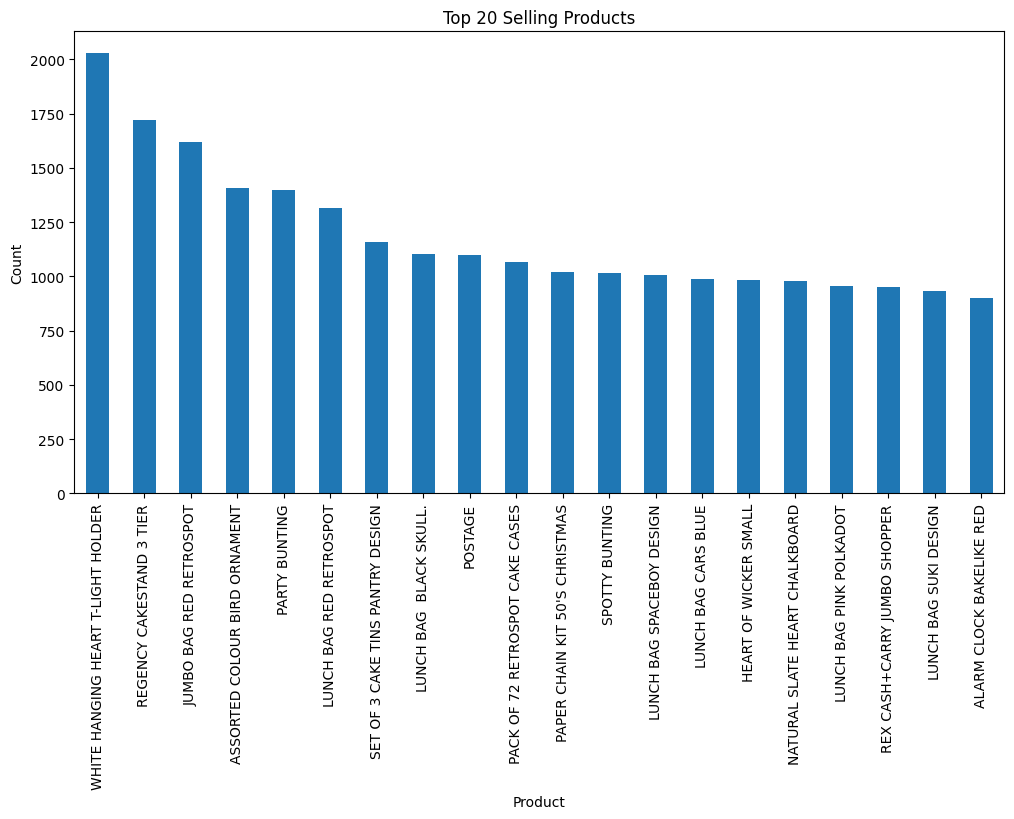

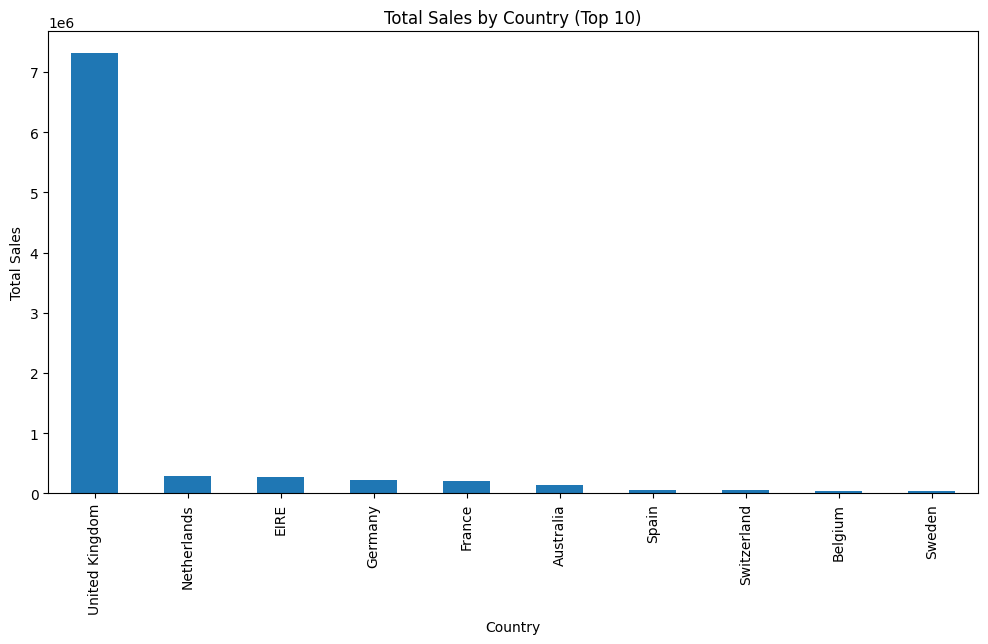

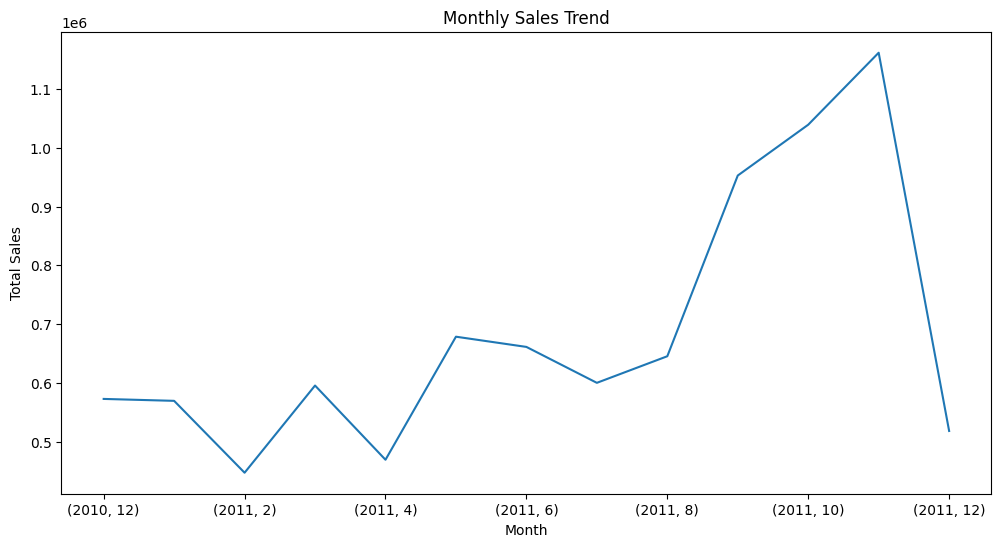

In [5]:
# Basic statistics
print("Basic statistics:\n", df_clean.describe())

# Top selling products
top_products = df_clean['Description'].value_counts().head(20)
plt.figure(figsize=(12, 6))
top_products.plot(kind='bar')
plt.title('Top 20 Selling Products')
plt.xlabel('Product')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

# Sales by country
country_sales = df_clean.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
country_sales.plot(kind='bar')
plt.title('Total Sales by Country (Top 10)')
plt.xlabel('Country')
plt.ylabel('Total Sales')
plt.show()

# Time-based analysis
monthly_sales = df_clean.groupby(['Year', 'Month'])['TotalPrice'].sum()
monthly_sales.plot(figsize=(12, 6))
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()

Top association rules:
                                          antecedents  \
75                   (PINK REGENCY TEACUP AND SAUCER)   
70  (GREEN REGENCY TEACUP AND SAUCER, ROSES REGENC...   
72  (ROSES REGENCY TEACUP AND SAUCER, PINK REGENCY...   
73                  (GREEN REGENCY TEACUP AND SAUCER)   
9                    (PINK REGENCY TEACUP AND SAUCER)   
8                   (GREEN REGENCY TEACUP AND SAUCER)   
71  (GREEN REGENCY TEACUP AND SAUCER, PINK REGENCY...   
63                   (PINK REGENCY TEACUP AND SAUCER)   
62                  (ROSES REGENCY TEACUP AND SAUCER)   
12                  (GREEN REGENCY TEACUP AND SAUCER)   

                                          consequents  antecedent support  \
75  (GREEN REGENCY TEACUP AND SAUCER, ROSES REGENC...            0.030002   
70                   (PINK REGENCY TEACUP AND SAUCER)            0.029193   
72                  (GREEN REGENCY TEACUP AND SAUCER)            0.023527   
73  (ROSES REGENCY TEACUP AND SAUCER, PIN

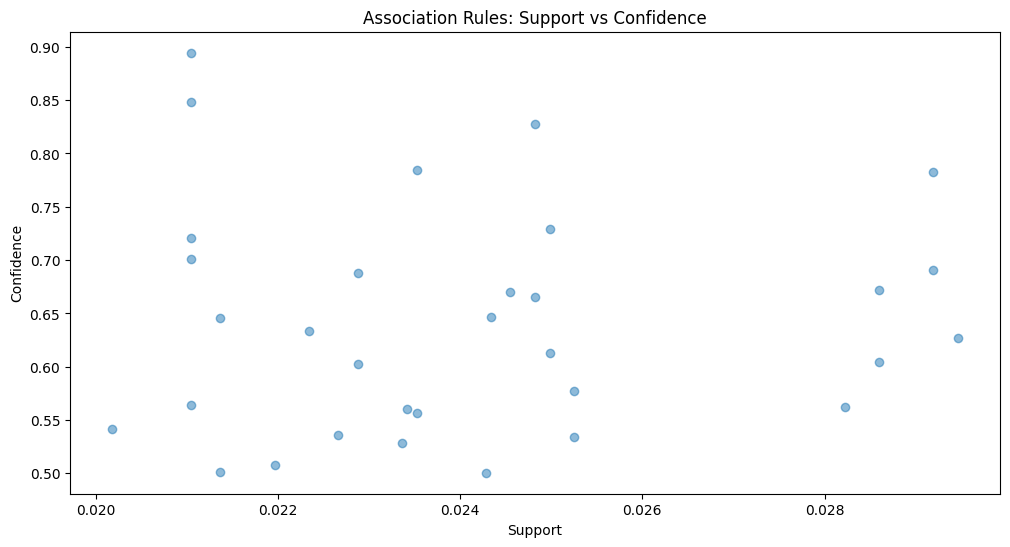

In [6]:
#Market Basket Analysis (Association Rule Mining)
# Prepare data for association rule mining
def prepare_basket_data(df):
    # Group by InvoiceNo and get list of products
    basket = df.groupby(['InvoiceNo', 'Description'])['Quantity'].sum().unstack().reset_index().fillna(0).set_index('InvoiceNo')

    # Convert quantities to binary (1 if purchased, 0 otherwise)
    basket = basket.applymap(lambda x: 1 if x > 0 else 0)

    return basket

basket_data = prepare_basket_data(df_clean)

# Generate frequent itemsets
frequent_itemsets = apriori(basket_data, min_support=0.02, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Filter rules with high confidence and lift
strong_rules = rules[(rules['confidence'] >= 0.5) & (rules['lift'] >= 3)]

# Display top association rules
print("Top association rules:")
print(strong_rules.sort_values('lift', ascending=False).head(10))

# Visualize association rules
plt.figure(figsize=(12, 6))
plt.scatter(strong_rules['support'], strong_rules['confidence'], alpha=0.5)
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Association Rules: Support vs Confidence')
plt.show()

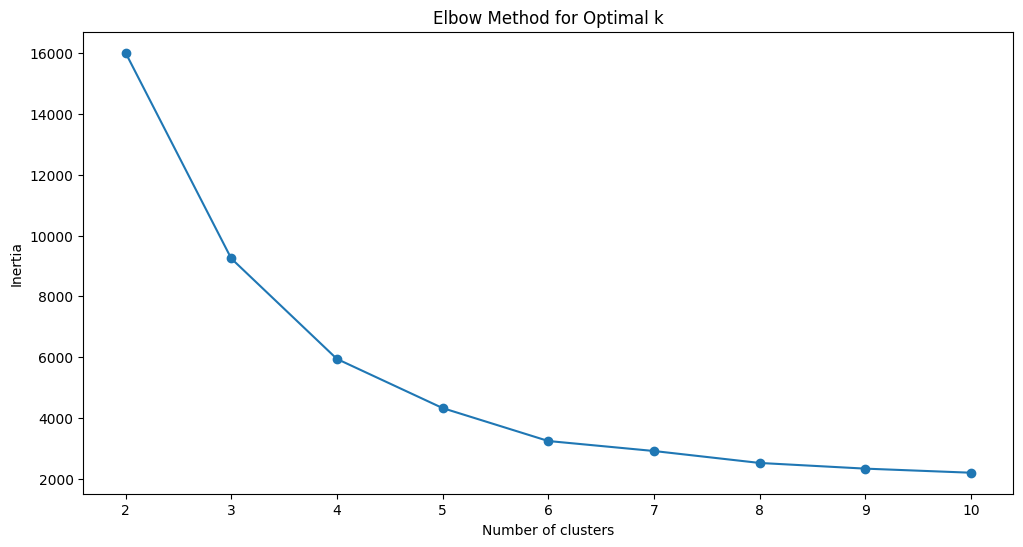


Cluster summary:
              Quantity     TotalPrice  PurchaseCount    AvgPrice   AvgQuantity
Cluster                                                                      
0          653.600173    1017.743204      59.406187    3.249862     11.094229
1        80995.000000  168469.600000       1.000000    2.080000  80995.000000
2        29943.333333   56962.487333    1080.666667    3.932825     53.685066
3           38.500000   25762.930000       9.000000  696.823750     15.750000
4         6109.992288   11096.661671     426.596401    2.615057     17.479218


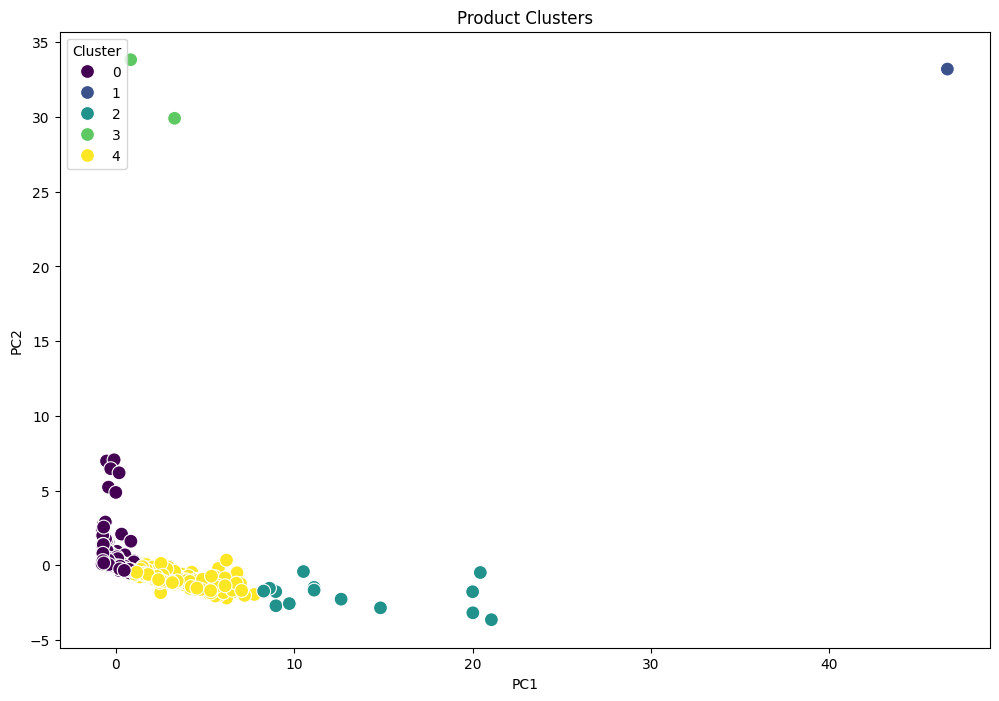

In [8]:
#Product Clustering for Complementary Bundles
# Prepare data for clustering
def prepare_clustering_data(df):
    # Calculate product metrics
    product_metrics = df.groupby('Description').agg({
        'Quantity': 'sum',
        'TotalPrice': 'sum',
        'InvoiceNo': 'nunique'
    }).rename(columns={'InvoiceNo': 'PurchaseCount'})

    # Calculate average price and quantity per transaction
    product_metrics['AvgPrice'] = product_metrics['TotalPrice'] / product_metrics['Quantity']
    product_metrics['AvgQuantity'] = product_metrics['Quantity'] / product_metrics['PurchaseCount']

    # Standardize the data
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(product_metrics)

    return product_metrics, scaled_data

product_metrics, scaled_data = prepare_clustering_data(df_clean)

# Determine optimal number of clusters using elbow method
inertia = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(12, 6))
plt.plot(range(2, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

# Apply K-means clustering
optimal_clusters = 5  # Based on elbow method
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
product_metrics['Cluster'] = kmeans.fit_predict(scaled_data)

# Analyze clusters
cluster_summary = product_metrics.groupby('Cluster').mean()
print("\nCluster summary:\n", cluster_summary)

# Visualize clusters (using PCA for dimensionality reduction)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)
product_metrics['PC1'] = principal_components[:, 0]
product_metrics['PC2'] = principal_components[:, 1]

plt.figure(figsize=(12, 8))
sns.scatterplot(data=product_metrics, x='PC1', y='PC2', hue='Cluster', palette='viridis', s=100)
plt.title('Product Clusters')
plt.show()

In [9]:
#Bundle Generation
def generate_bundles(strong_rules, product_metrics, n_bundles=10):
    # Create product bundles from association rules
    bundles = []
    for _, rule in strong_rules.iterrows():
        antecedents = list(rule['antecedents'])
        consequents = list(rule['consequents'])

        # Combine antecedents and consequents
        bundle_items = antecedents + consequents
        bundle_name = " + ".join(bundle_items)

        # Calculate bundle metrics
        bundle_products = product_metrics.loc[list(bundle_items)]
        total_value = bundle_products['TotalPrice'].sum()
        avg_price = bundle_products['AvgPrice'].mean()

        bundles.append({
            'bundle_name': bundle_name,
            'products': bundle_items,
            'total_value': total_value,
            'avg_price': avg_price,
            'support': rule['support'],
            'confidence': rule['confidence'],
            'lift': rule['lift']
        })

    # Create bundles from clusters (complementary products)
    for cluster_id in range(optimal_clusters):
        cluster_products = product_metrics[product_metrics['Cluster'] == cluster_id]
        top_products = cluster_products.nlargest(3, 'PurchaseCount').index.tolist()

        if len(top_products) >= 2:
            bundle_name = " + ".join(top_products)
            bundle_products = product_metrics.loc[top_products]
            total_value = bundle_products['TotalPrice'].sum()
            avg_price = bundle_products['AvgPrice'].mean()

            bundles.append({
                'bundle_name': bundle_name,
                'products': top_products,
                'total_value': total_value,
                'avg_price': avg_price,
                'support': None,
                'confidence': None,
                'lift': None,
                'type': 'complementary'
            })

    # Sort bundles by lift (for association-based) or purchase count (for cluster-based)
    bundles_df = pd.DataFrame(bundles)
    bundles_df = bundles_df.sort_values(by=['lift', 'total_value'], ascending=[False, False])

    return bundles_df.head(n_bundles)

bundles = generate_bundles(strong_rules, product_metrics)
print("\nTop product bundles:\n", bundles)


Top product bundles:
                                           bundle_name  \
31  PINK REGENCY TEACUP AND SAUCER + GREEN REGENCY...   
27  GREEN REGENCY TEACUP AND SAUCER + ROSES REGENC...   
29  ROSES REGENCY TEACUP AND SAUCER + PINK REGENCY...   
30  GREEN REGENCY TEACUP AND SAUCER + ROSES REGENC...   
8   PINK REGENCY TEACUP AND SAUCER + GREEN REGENCY...   
7   GREEN REGENCY TEACUP AND SAUCER + PINK REGENCY...   
28  GREEN REGENCY TEACUP AND SAUCER + PINK REGENCY...   
21  ROSES REGENCY TEACUP AND SAUCER + PINK REGENCY...   
22  PINK REGENCY TEACUP AND SAUCER + ROSES REGENCY...   
10  GREEN REGENCY TEACUP AND SAUCER + ROSES REGENC...   

                                             products  total_value  avg_price  \
31  [PINK REGENCY TEACUP AND SAUCER, GREEN REGENCY...     57441.43   2.752146   
27  [GREEN REGENCY TEACUP AND SAUCER, ROSES REGENC...     57441.43   2.752146   
29  [ROSES REGENCY TEACUP AND SAUCER, PINK REGENCY...     57441.43   2.752146   
30  [GREEN REGENCY TEACUP

In [10]:
#Pricing Strategy for Bundles
def calculate_bundle_pricing(bundles):
    # Apply different pricing strategies
    pricing_strategies = []

    for _, bundle in bundles.iterrows():
        individual_price = bundle['total_value']
        products = bundle['products']

        # Strategy 1: Fixed percentage discount (15%)
        discount_price1 = individual_price * 0.85

        # Strategy 2: Cheapest product free
        product_prices = [product_metrics.loc[p, 'AvgPrice'] for p in products]
        discount_price2 = individual_price - min(product_prices)

        # Strategy 3: Tiered discount based on bundle value
        if individual_price < 20:
            discount_price3 = individual_price * 0.90  # 10% discount
        elif individual_price < 50:
            discount_price3 = individual_price * 0.85  # 15% discount
        else:
            discount_price3 = individual_price * 0.80  # 20% discount

        # Strategy 4: Psychological pricing (just below round number)
        discount_price4 = (individual_price * 0.85) // 1 + 0.99

        pricing_strategies.append({
            'bundle_name': bundle['bundle_name'],
            'individual_price': round(individual_price, 2),
            'discount_price1': round(discount_price1, 2),
            'discount_price2': round(discount_price2, 2),
            'discount_price3': round(discount_price3, 2),
            'discount_price4': round(discount_price4, 2),
            'savings1': round(individual_price - discount_price1, 2),
            'savings2': round(individual_price - discount_price2, 2),
            'savings3': round(individual_price - discount_price3, 2),
            'savings4': round(individual_price - discount_price4, 2),
        })

    return pd.DataFrame(pricing_strategies)

bundle_pricing = calculate_bundle_pricing(bundles)
print("\nBundle pricing strategies:\n", bundle_pricing)


Bundle pricing strategies:
                                          bundle_name  individual_price  \
0  PINK REGENCY TEACUP AND SAUCER + GREEN REGENCY...          57441.43   
1  GREEN REGENCY TEACUP AND SAUCER + ROSES REGENC...          57441.43   
2  ROSES REGENCY TEACUP AND SAUCER + PINK REGENCY...          57441.43   
3  GREEN REGENCY TEACUP AND SAUCER + ROSES REGENC...          57441.43   
4  PINK REGENCY TEACUP AND SAUCER + GREEN REGENCY...          32575.83   
5  GREEN REGENCY TEACUP AND SAUCER + PINK REGENCY...          32575.83   
6  GREEN REGENCY TEACUP AND SAUCER + PINK REGENCY...          57441.43   
7  ROSES REGENCY TEACUP AND SAUCER + PINK REGENCY...          39635.09   
8  PINK REGENCY TEACUP AND SAUCER + ROSES REGENCY...          39635.09   
9  GREEN REGENCY TEACUP AND SAUCER + ROSES REGENC...          42671.94   

   discount_price1  discount_price2  discount_price3  discount_price4  \
0         48825.22         57438.71         45953.14         48825.99   
1         


A/B Test Results:

Conversion Rates:
 group
strategy1    0.456044
strategy2    0.309524
strategy3    0.528571
strategy4    0.402597
Name: accepted, dtype: float64

AOV Impact:
            individual_price  offered_price
group                                     
strategy1      49993.815904   42494.743518
strategy2      48466.990192   48466.990192
strategy3      50677.013108   50677.013108
strategy4      47520.218387   47520.218387

Revenue Impact:
 group
strategy1    3527063.712
strategy2    2520283.490
strategy3    3750098.970
strategy4    2946253.540
dtype: float64


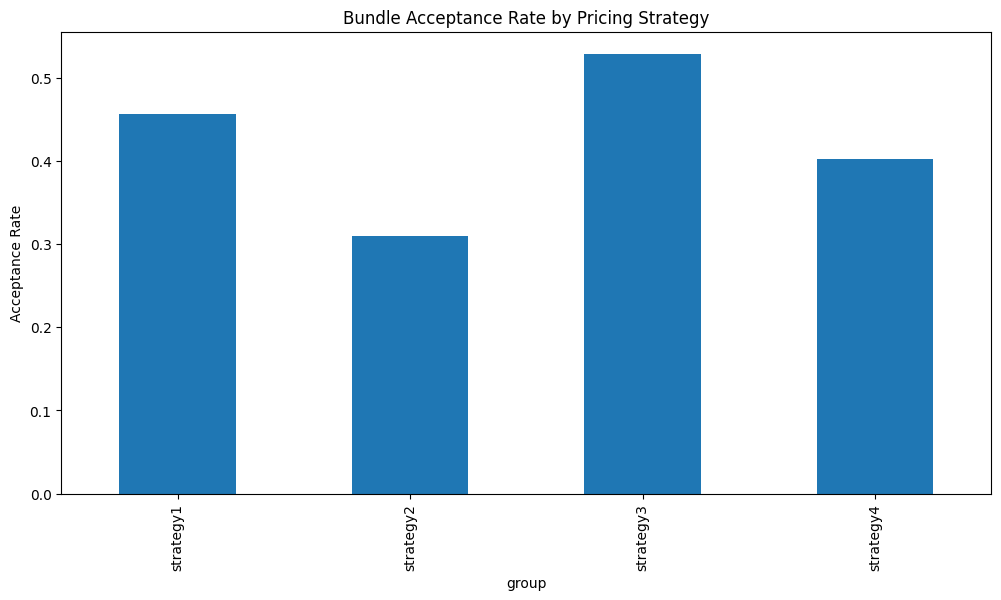

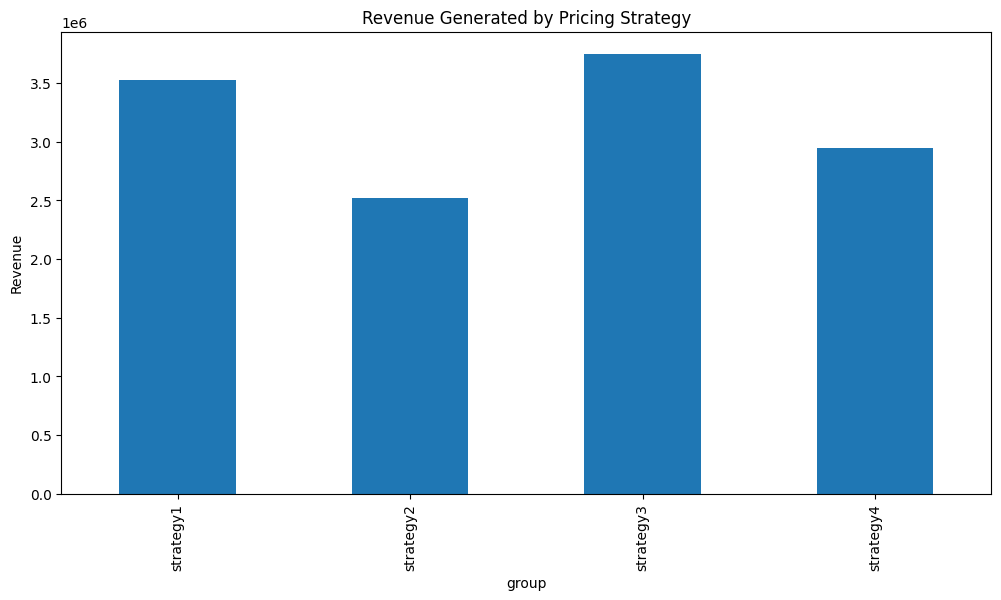

In [11]:
#A/B Testing Framework
# Simulate customer behavior for A/B testing
class ABTestingFramework:
    def __init__(self, df, bundles):
        self.df = df
        self.bundles = bundles
        self.customer_data = self.prepare_customer_data()

    def prepare_customer_data(self):
        # Create customer purchase history
        customer_history = self.df.groupby('CustomerID').agg({
            'InvoiceNo': 'nunique',
            'TotalPrice': 'sum',
            'Description': lambda x: list(x.unique())
        }).rename(columns={'InvoiceNo': 'PurchaseCount', 'TotalPrice': 'TotalSpend'})

        return customer_history

    def simulate_purchase(self, customer_id, pricing_strategy):
        # Get customer history
        customer = self.customer_data.loc[customer_id]
        purchased_items = customer['Description']

        # Find relevant bundles (containing at least one item the customer is purchasing)
        relevant_bundles = []
        for _, bundle in self.bundles.iterrows():
            bundle_items = bundle['products']
            if any(item in purchased_items for item in bundle_items):
                relevant_bundles.append(bundle)

        if not relevant_bundles:
            return None, None  # No relevant bundles

        # Select a bundle to offer (random for simulation)
        offered_bundle = random.choice(relevant_bundles)

        # Apply pricing strategy
        if pricing_strategy == 1:
            price = offered_bundle['total_value'] * 0.85
        elif pricing_strategy == 2:
            product_prices = [product_metrics.loc[p, 'AvgPrice'] for p in offered_bundle['products']]
            price = offered_bundle['total_value'] - min(product_prices)
        elif pricing_strategy == 3:
            if offered_bundle['total_value'] < 20:
                price = offered_bundle['total_value'] * 0.90
            elif offered_bundle['total_value'] < 50:
                price = offered_bundle['total_value'] * 0.85
            else:
                price = offered_bundle['total_value'] * 0.80
        else:
            price = (offered_bundle['total_value'] * 0.85) // 1 + 0.99

        # Simulate customer decision (probability based on discount)
        discount = 1 - (price / offered_bundle['total_value'])
        acceptance_prob = min(0.3 + discount, 0.8)  # Base 30% + discount impact

        accepted = random.random() < acceptance_prob

        return offered_bundle, accepted

    def run_ab_test(self, sample_size=1000, test_duration=30):
        # Select random customers
        test_customers = random.sample(list(self.customer_data.index), sample_size)

        # Assign to groups (4 pricing strategies + control)
        group_size = sample_size // 5
        groups = {
            'control': test_customers[:group_size],
            'strategy1': test_customers[group_size:2*group_size],
            'strategy2': test_customers[2*group_size:3*group_size],
            'strategy3': test_customers[3*group_size:4*group_size],
            'strategy4': test_customers[4*group_size:5*group_size]
        }

        results = []

        # Simulate test duration (days)
        for day in range(test_duration):
            for group_name, customers in groups.items():
                if group_name == 'control':
                    # Control group - no bundles offered
                    for customer in customers:
                        # Simulate regular purchase
                        pass
                else:
                    strategy_num = int(group_name[-1])
                    for customer in customers:
                        bundle, accepted = self.simulate_purchase(customer, strategy_num)
                        if bundle is not None:
                            results.append({
                                'day': day,
                                'group': group_name,
                                'customer_id': customer,
                                'bundle_name': bundle['bundle_name'],
                                'individual_price': bundle['total_value'],
                                'offered_price': None if group_name == 'control' else bundle['total_value'] * (1 - (0.15 if strategy_num == 1 else 0)),
                                'accepted': accepted
                            })

        return pd.DataFrame(results)

# Initialize and run A/B test
ab_test = ABTestingFramework(df_clean, bundles)
ab_test_results = ab_test.run_ab_test(sample_size=500, test_duration=14)

# Analyze A/B test results
def analyze_ab_test_results(results):
    # Calculate conversion rates
    conversion_rates = results[results['group'] != 'control'].groupby('group')['accepted'].mean()

    # Calculate average order value impact
    aov_impact = results[results['accepted']].groupby('group').agg({
        'individual_price': 'mean',
        'offered_price': 'mean'
    })

    # Calculate revenue impact
    revenue = results.groupby('group').apply(lambda x: sum(x['offered_price'] * x['accepted'] if x.name != 'control' else 0))

    return conversion_rates, aov_impact, revenue

conversion_rates, aov_impact, revenue = analyze_ab_test_results(ab_test_results)

print("\nA/B Test Results:")
print("\nConversion Rates:\n", conversion_rates)
print("\nAOV Impact:\n", aov_impact)
print("\nRevenue Impact:\n", revenue)

# Visualize results
plt.figure(figsize=(12, 6))
conversion_rates.plot(kind='bar')
plt.title('Bundle Acceptance Rate by Pricing Strategy')
plt.ylabel('Acceptance Rate')
plt.show()

plt.figure(figsize=(12, 6))
revenue.plot(kind='bar')
plt.title('Revenue Generated by Pricing Strategy')
plt.ylabel('Revenue')
plt.show()

In [15]:
def calculate_performance_metrics(ab_test_results, original_df):
    # Calculate baseline metrics
    baseline_aov = original_df.groupby('InvoiceNo')['TotalPrice'].sum().mean()
    baseline_conversion = 1  # All visitors in our data made purchases

    # Calculate test metrics
    test_metrics = {}

    # Always include control group metrics
    test_metrics['control'] = {
        'aov': baseline_aov,
        'conversion_rate': baseline_conversion,
        'bundle_acceptance': 0,
        'revenue_per_customer': baseline_aov
    }

    # Calculate metrics for test groups
    for group in ab_test_results['group'].unique():
        if group == 'control':
            continue  # Already handled

        group_data = ab_test_results[ab_test_results['group'] == group]
        accepted_bundles = group_data[group_data['accepted']]

        if not accepted_bundles.empty:
            aov = accepted_bundles['offered_price'].mean()
            bundle_acceptance = group_data['accepted'].mean()
            revenue_per_customer = accepted_bundles['offered_price'].sum() / len(group_data['customer_id'].unique())
        else:
            # If no bundles were accepted in this group, use baseline metrics
            aov = baseline_aov
            bundle_acceptance = 0
            revenue_per_customer = baseline_aov

        test_metrics[group] = {
            'aov': aov,
            'conversion_rate': baseline_conversion,
            'bundle_acceptance': bundle_acceptance,
            'revenue_per_customer': revenue_per_customer
        }

    return pd.DataFrame(test_metrics).T

performance_metrics = calculate_performance_metrics(ab_test_results, df_clean)
print("\nPerformance Metrics:\n", performance_metrics)

def calculate_uplift(performance_metrics):
    # Ensure control group exists
    if 'control' not in performance_metrics.index:
        raise ValueError("Control group metrics are required for uplift calculation")

    control_aov = performance_metrics.loc['control', 'aov']
    control_revenue = performance_metrics.loc['control', 'revenue_per_customer']

    uplift = {}
    for group in performance_metrics.index:
        if group != 'control':
            aov_uplift = (performance_metrics.loc[group, 'aov'] - control_aov) / control_aov * 100
            revenue_uplift = (performance_metrics.loc[group, 'revenue_per_customer'] - control_revenue) / control_revenue * 100

            uplift[group] = {
                'aov_uplift_pct': aov_uplift,
                'revenue_uplift_pct': revenue_uplift
            }

    return pd.DataFrame(uplift).T

uplift_metrics = calculate_uplift(performance_metrics)
print("\nUplift Metrics:\n", uplift_metrics)


Performance Metrics:
                     aov  conversion_rate  bundle_acceptance  \
control      480.865956              1.0           0.000000   
strategy1  42494.743518              1.0           0.456044   
strategy2  48466.990192              1.0           0.309524   
strategy3  50677.013108              1.0           0.528571   
strategy4  47520.218387              1.0           0.402597   

           revenue_per_customer  
control              480.865956  
strategy1         271312.593231  
strategy2         210023.624167  
strategy3         375009.897000  
strategy4         267841.230909  

Uplift Metrics:
            aov_uplift_pct  revenue_uplift_pct
strategy1     8737.128716        56321.667955
strategy2     9979.106152        43576.126657
strategy3    10438.698453        77886.368552
strategy4     9782.217228        55599.769831


In [16]:
#Bundle Recommendation Engine
class BundleRecommendationEngine:
    def __init__(self, bundles, product_metrics, pricing_strategy=3):
        self.bundles = bundles
        self.product_metrics = product_metrics
        self.pricing_strategy = pricing_strategy

    def calculate_bundle_price(self, bundle, strategy=None):
        if strategy is None:
            strategy = self.pricing_strategy

        individual_price = bundle['total_value']

        if strategy == 1:
            return individual_price * 0.85
        elif strategy == 2:
            product_prices = [self.product_metrics.loc[p, 'AvgPrice'] for p in bundle['products']]
            return individual_price - min(product_prices)
        elif strategy == 3:
            if individual_price < 20:
                return individual_price * 0.90
            elif individual_price < 50:
                return individual_price * 0.85
            else:
                return individual_price * 0.80
        else:
            return (individual_price * 0.85) // 1 + 0.99

    def recommend_bundles(self, product_list, n_recommendations=3):
        # Find bundles that contain at least one product from the product_list
        relevant_bundles = []
        for _, bundle in self.bundles.iterrows():
            bundle_items = bundle['products']
            if any(item in product_list for item in bundle_items):
                # Calculate discount price
                discount_price = self.calculate_bundle_price(bundle)
                savings = bundle['total_value'] - discount_price

                relevant_bundles.append({
                    'bundle_name': bundle['bundle_name'],
                    'products': bundle_items,
                    'individual_price': round(bundle['total_value'], 2),
                    'discount_price': round(discount_price, 2),
                    'savings': round(savings, 2),
                    'savings_pct': round(savings / bundle['total_value'] * 100, 1)
                })

        # Sort by savings percentage and return top recommendations
        relevant_bundles.sort(key=lambda x: x['savings_pct'], reverse=True)
        return relevant_bundles[:n_recommendations]

# Initialize recommendation engine
recommendation_engine = BundleRecommendationEngine(bundles, product_metrics)

# Test recommendation engine
sample_products = ['WHITE HANGING HEART T-LIGHT HOLDER', 'WHITE METAL LANTERN']
recommendations = recommendation_engine.recommend_bundles(sample_products)
print("\nBundle Recommendations:\n", pd.DataFrame(recommendations))


Bundle Recommendations:
 Empty DataFrame
Columns: []
Index: []


In [17]:
def implement_bundling_strategy(df, bundles, best_strategy):
    # Initialize recommendation engine with best strategy
    engine = BundleRecommendationEngine(bundles, product_metrics, best_strategy)

    # Simulate implementation on historical data
    simulated_results = []

    # Group by invoice to simulate shopping sessions
    invoices = df.groupby('InvoiceNo')

    for invoice_no, group in invoices:
        products_in_cart = group['Description'].tolist()

        # Get recommendations
        recommendations = engine.recommend_bundles(products_in_cart)

        if recommendations:
            # Simulate showing recommendations to customer
            for rec in recommendations:
                # Simulate acceptance (probability based on savings)
                acceptance_prob = min(0.3 + (rec['savings_pct'] / 100), 0.8)
                accepted = random.random() < acceptance_prob

                if accepted:
                    simulated_results.append({
                        'invoice_no': invoice_no,
                        'original_amount': group['TotalPrice'].sum(),
                        'bundle_name': rec['bundle_name'],
                        'bundle_price': rec['discount_price'],
                        'savings': rec['savings'],
                        'new_amount': group['TotalPrice'].sum() + rec['discount_price']
                    })
                    break  # Assume customer accepts at most one bundle

    return pd.DataFrame(simulated_results)

# Determine best strategy from A/B test (highest revenue)
best_strategy = uplift_metrics['revenue_uplift_pct'].idxmax()
best_strategy_num = int(best_strategy[-1])

# Simulate implementation
implementation_results = implement_bundling_strategy(df_clean, bundles, best_strategy_num)

# Calculate impact
if not implementation_results.empty:
    total_original = implementation_results['original_amount'].sum()
    total_new = implementation_results['new_amount'].sum()
    uplift = (total_new - total_original) / total_original * 100

    print(f"\nImplementation with {best_strategy}:")
    print(f"Original revenue for affected orders: ${total_original:.2f}")
    print(f"New revenue with bundles: ${total_new:.2f}")
    print(f"Revenue uplift: {uplift:.2f}%")
    print(f"Bundles accepted: {len(implementation_results)}")
else:
    print("\nNo bundles would have been accepted in this simulation.")


Implementation with strategy3:
Original revenue for affected orders: $798811.87
New revenue with bundles: $40318512.27
Revenue uplift: 4947.31%
Bundles accepted: 860


In [18]:
def continuous_improvement(df, initial_bundles, n_iterations=5):
    current_bundles = initial_bundles.copy()

    for i in range(n_iterations):
        print(f"\n=== Iteration {i+1} ===")

        # Run A/B test with current bundles
        ab_test = ABTestingFramework(df, current_bundles)
        ab_test_results = ab_test.run_ab_test(sample_size=500, test_duration=7)

        # Analyze results
        conversion_rates, aov_impact, revenue = analyze_ab_test_results(ab_test_results)
        best_strategy = revenue.idxmax()

        print(f"Best strategy this iteration: {best_strategy}")
        print("Conversion rates:\n", conversion_rates)

        # Refine bundles based on performance
        # Remove poorly performing bundles (acceptance rate < 10%)
        accepted_bundles = ab_test_results[ab_test_results['accepted']]['bundle_name'].value_counts()
        total_offered = ab_test_results['bundle_name'].value_counts()
        acceptance_rates = (accepted_bundles / total_offered).fillna(0)

        # Keep only bundles with acceptance rate > 10%
        good_bundles = acceptance_rates[acceptance_rates > 0.1].index
        current_bundles = current_bundles[current_bundles['bundle_name'].isin(good_bundles)]

        print(f"Bundles reduced from {len(initial_bundles)} to {len(current_bundles)}")

        # Generate some new bundles to test
        if i < n_iterations - 1:
            # Get top products not currently in bundles
            all_bundled_products = set()
            for products in current_bundles['products']:
                all_bundled_products.update(products)

            top_products = df['Description'].value_counts().index.tolist()
            new_products = [p for p in top_products if p not in all_bundled_products][:10]

            # Create some new bundles with these products
            new_bundles = []
            for j in range(0, len(new_products), 2):
                if j+1 < len(new_products):
                    bundle_name = f"{new_products[j]} + {new_products[j+1]}"
                    bundle_products = [new_products[j], new_products[j+1]]

                    bundle_metrics = product_metrics.loc[bundle_products]
                    total_value = bundle_metrics['TotalPrice'].sum()
                    avg_price = bundle_metrics['AvgPrice'].mean()

                    new_bundles.append({
                        'bundle_name': bundle_name,
                        'products': bundle_products,
                        'total_value': total_value,
                        'avg_price': avg_price,
                        'support': None,
                        'confidence': None,
                        'lift': None,
                        'type': 'new'
                    })

            # Add new bundles to current bundles
            current_bundles = pd.concat([current_bundles, pd.DataFrame(new_bundles)])
            print(f"Added {len(new_bundles)} new bundles for next iteration")

    return current_bundles

# Run continuous improvement
final_bundles = continuous_improvement(df_clean, bundles)
print("\nFinal optimized bundles:\n", final_bundles)


=== Iteration 1 ===
Best strategy this iteration: strategy3
Conversion rates:
 group
strategy1    0.467532
strategy2    0.252101
strategy3    0.457143
strategy4    0.441558
Name: accepted, dtype: float64
Bundles reduced from 10 to 10
Added 5 new bundles for next iteration

=== Iteration 2 ===
Best strategy this iteration: strategy4
Conversion rates:
 group
strategy1    0.447479
strategy2    0.289628
strategy3    0.502381
strategy4    0.474654
Name: accepted, dtype: float64
Bundles reduced from 10 to 15
Added 5 new bundles for next iteration

=== Iteration 3 ===
Best strategy this iteration: strategy4
Conversion rates:
 group
strategy1    0.440154
strategy2    0.282143
strategy3    0.448413
strategy4    0.493827
Name: accepted, dtype: float64
Bundles reduced from 10 to 20
Added 5 new bundles for next iteration

=== Iteration 4 ===
Best strategy this iteration: strategy4
Conversion rates:
 group
strategy1    0.442177
strategy2    0.297762
strategy3    0.479853
strategy4    0.405042
Name